In [1]:
!python -V

Python 3.10.13


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras as ks
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score, classification_report
from sklearn.metrics import precision_recall_curve, auc, average_precision_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import visualkeras
from PIL import ImageFont
tf.random.set_seed(0)
np.random.seed(0)

In [3]:
tf.__version__

'2.14.0'

In [4]:
ks.__version__

'2.14.0'

In [5]:
IMG_SIZE = 64
BATCH_SIZE = 32

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [7]:
training_set = train_datagen.flow_from_directory('training_set',
                                                 seed=0,
                                                 target_size = (IMG_SIZE, IMG_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'binary')

Found 8000 images belonging to 2 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
test_set = test_datagen.flow_from_directory('test_set',
                                            seed=0,
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [10]:
cnn = tf.keras.models.Sequential()
# CONVOLUTION LAYER
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=training_set.image_shape))
# POOLING LAYER
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# 2ND CONVOLUTION LAYER
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
# FLATTENING LAYER
cnn.add(tf.keras.layers.Flatten())
# FULLY CONNECTED LAYER
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
# OUTPUT LAYER
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
250/250 [==============================] - 20s 79ms/step - loss: 0.6612 - accuracy: 0.6036 - val_loss: 0.6066 - val_accuracy: 0.6795
Epoch 2/25
250/250 [==============================] - 15s 59ms/step - loss: 0.5937 - accuracy: 0.6865 - val_loss: 0.5658 - val_accuracy: 0.7205
Epoch 3/25
250/250 [==============================] - 15s 59ms/step - loss: 0.5506 - accuracy: 0.7174 - val_loss: 0.5212 - val_accuracy: 0.7480
Epoch 4/25
250/250 [==============================] - 15s 60ms/step - loss: 0.5311 - accuracy: 0.7283 - val_loss: 0.6124 - val_accuracy: 0.6615
Epoch 5/25
250/250 [==============================] - 15s 60ms/step - loss: 0.5134 - accuracy: 0.7440 - val_loss: 0.5505 - val_accuracy: 0.7265
Epoch 6/25
250/250 [==============================] - 15s 61ms/step - loss: 0.4874 - accuracy: 0.7625 - val_loss: 0.4832 - val_accuracy: 0.7740
Epoch 7/25
250/250 [==============================] - 15s 60ms/step - loss: 0.4754 - accuracy: 0.7670 - val_loss: 0.5115 - val_accuracy:

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

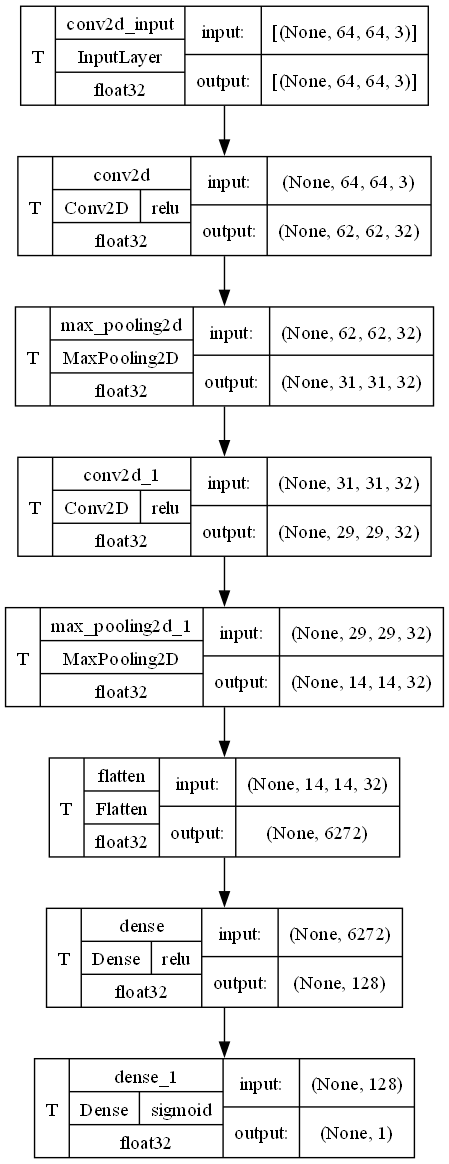

In [12]:
ks.utils.plot_model(
    cnn,
    to_file="model.png",
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=100,
    show_layer_activations=True,
    show_trainable=True,
)

<class '__main__.FontObj'>
[50, 20]


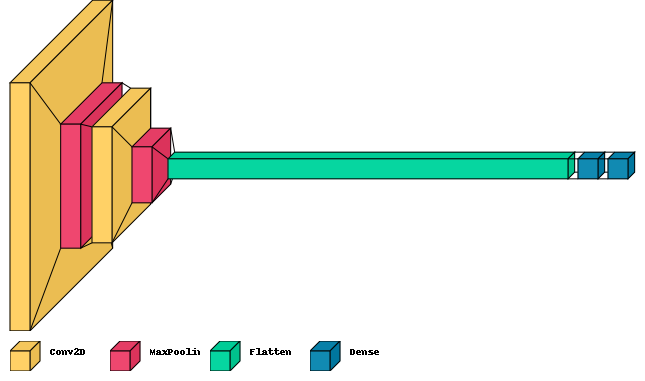

In [13]:
# visualkeras.layered_view(ann)

# ann.add(visualkeras.SpacingDummyLayer(spacing=100))

# visualkeras.layered_view(ann, spacing=0)
class FontObj:
    def __init__(self, object):
        self.object = object
        
    def getsize(*args, **kwargs):
        return [50, 20]

    def getmask(self, *args, **kwargs):
        return self.object.getmask(*args, **kwargs)
font = ImageFont.load_default()

font = FontObj(font)
print(type(font))
print(font.getsize())
visualkeras.layered_view(cnn, legend=True, font=font)  # font is optional!

In [14]:
test_set_labels = []
for i in test_set.index_array:
    test_set_labels.append([test_set.labels[i].astype(int)])
test_set_labels = pd.DataFrame(test_set_labels, columns=['result'])

In [15]:
y_pred = cnn.predict(test_set)
y_pred_prob = y_pred.copy()
y_pred = (y_pred > 0.5)
# y_pred = [x[0].astype(int) for x in y_pred]
# y_pred_prob = [x[0].astype(float) for x in y_pred_prob]

63/63 [==============================] - 2s 24ms/step


Accuracy:  79.75
[[749 251]
 [154 846]]


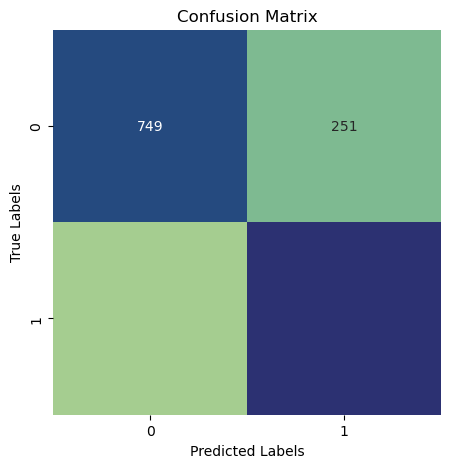

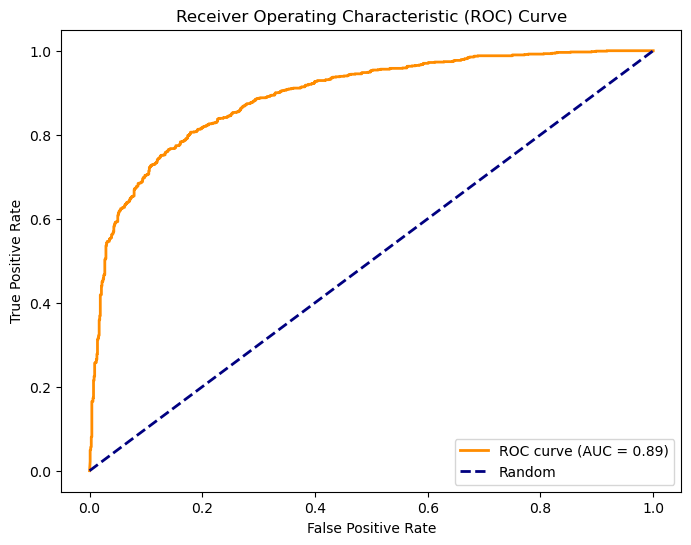

              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1000
           1       0.77      0.85      0.81      1000

    accuracy                           0.80      2000
   macro avg       0.80      0.80      0.80      2000
weighted avg       0.80      0.80      0.80      2000



In [16]:
cm = confusion_matrix(test_set_labels, y_pred)

print('Accuracy: ', accuracy_score(test_set_labels, y_pred)*100)


print(cm)

plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='crest', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show();

fpr, tpr, thresholds = roc_curve(test_set_labels, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show();

print(classification_report(test_set_labels, y_pred))

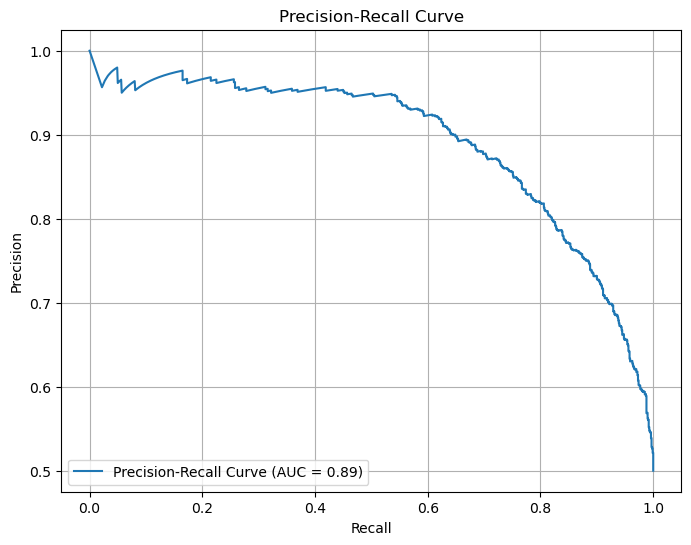

In [17]:
# Compute precision-recall curve and area under the curve (AUC)

precision, recall, thresholds = precision_recall_curve(test_set_labels, y_pred_prob)
area_under_curve = auc(recall, precision)
average_precision = average_precision_score(test_set_labels, y_pred_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {area_under_curve:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

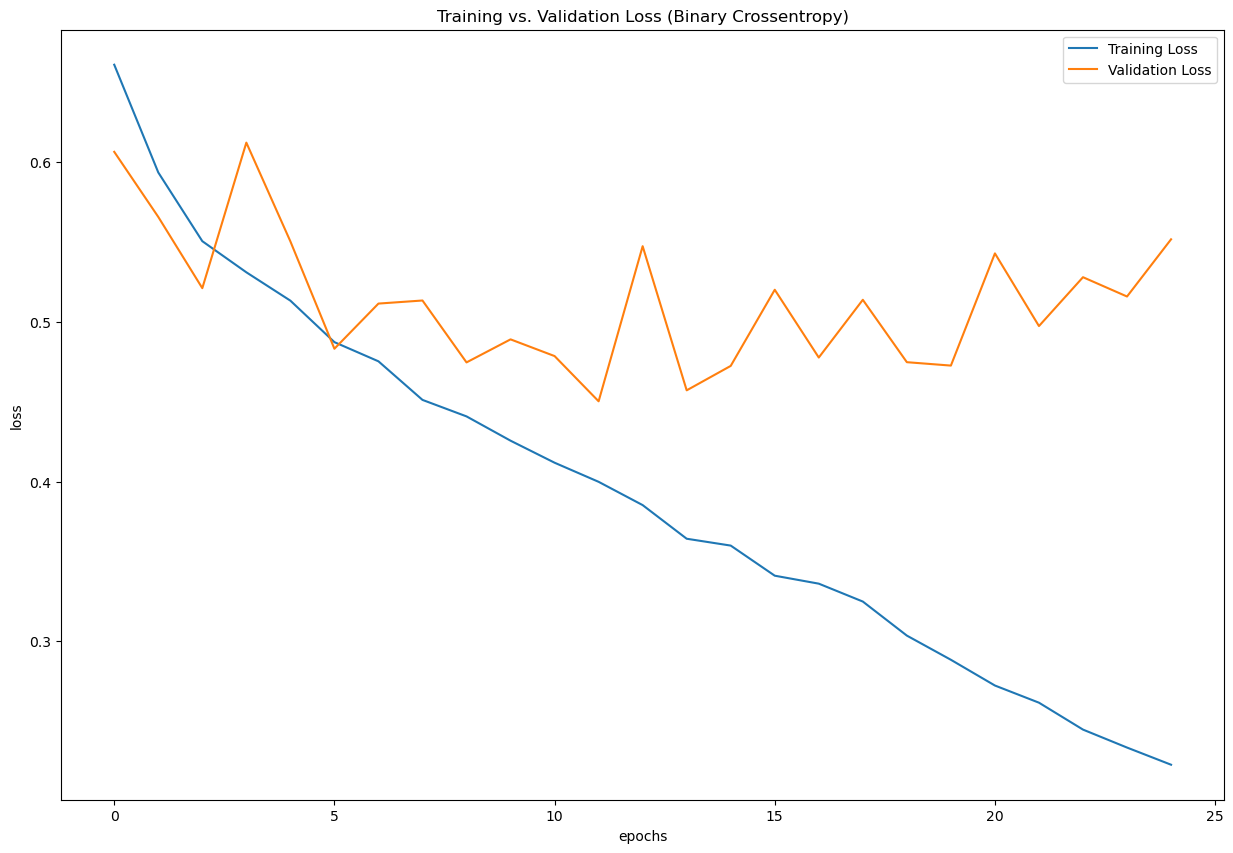

In [18]:
plt.figure(figsize=(15,10))
plt.plot(history.history[list(history.history.keys())[0]],label='Training Loss')
plt.plot(history.history[list(history.history.keys())[2]],label='Validation Loss')
plt.title(f'Training vs. Validation Loss (Binary Crossentropy)')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Max Train accuracy:  0.9104999899864197  | Max Val accuracy:  0.8065000176429749


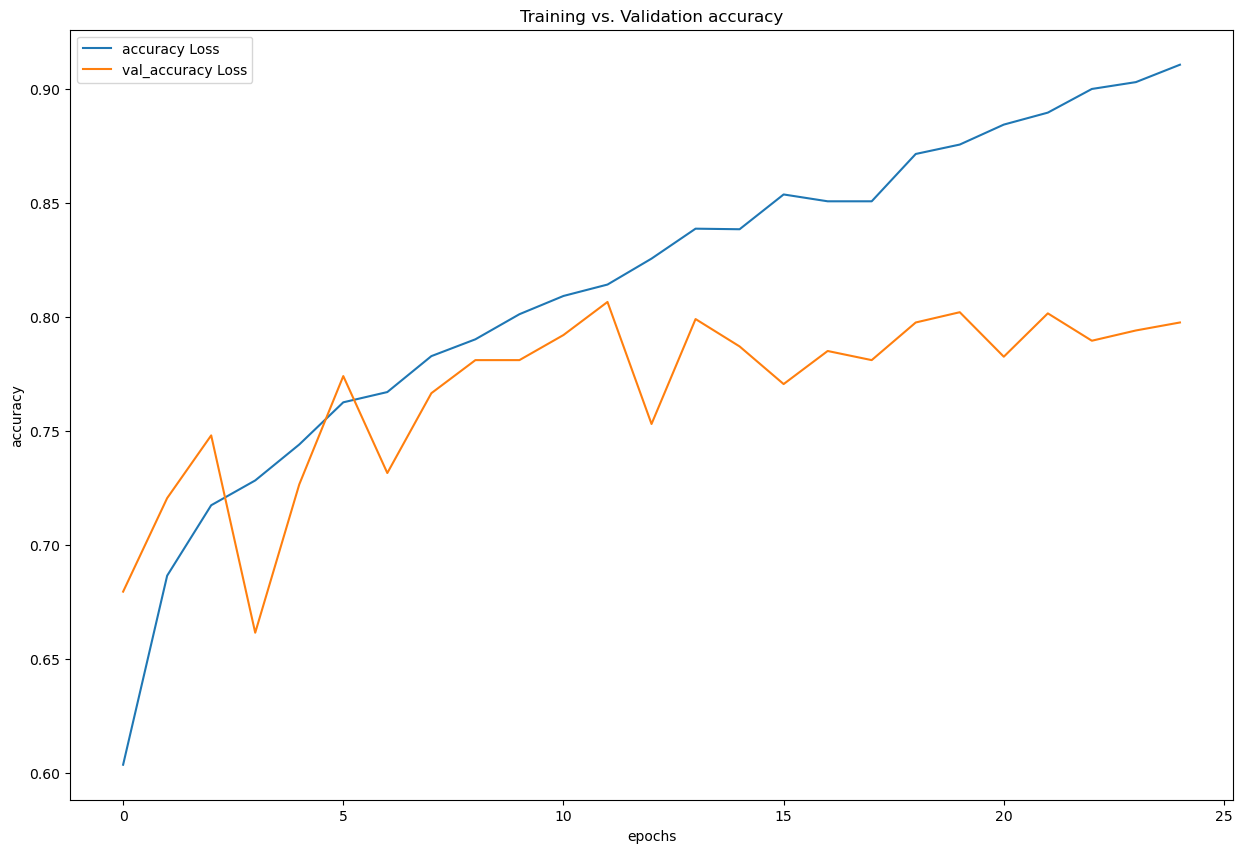

In [19]:
print(f'Max Train {list(history.history.keys())[1]}: ', max(history.history[list(history.history.keys())[1]]), f' | Max Val {list(history.history.keys())[1]}: ', max(history.history[list(history.history.keys())[-1]]))

plt.figure(figsize=(15,10))
plt.plot(history.history[list(history.history.keys())[1]],label=f'{list(history.history.keys())[1]} Loss')
plt.plot(history.history[list(history.history.keys())[-1]],label=f'{list(history.history.keys())[-1]} Loss')
plt.title(f'Training vs. Validation {list(history.history.keys())[1]}')
plt.xlabel('epochs')
plt.ylabel(f'{list(history.history.keys())[1]}')
# plt.ylim(0, 1)
plt.legend()
plt.show()

## Predicting one sample

In [20]:
test_image = image.load_img('IMG_5707.PNG', target_size = (IMG_SIZE, IMG_SIZE))

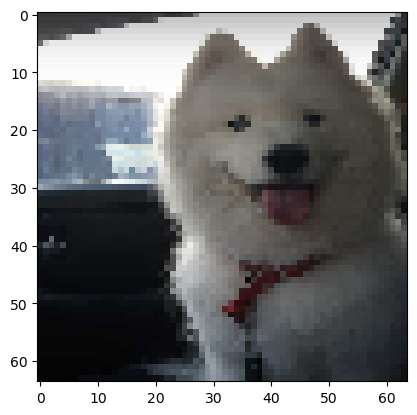

In [21]:
plt.imshow(test_image)

In [22]:
test_image = image.img_to_array(test_image)/255.0

In [23]:
test_image = np.expand_dims(test_image, axis = 0)

In [24]:
test_image.shape

(1, 64, 64, 3)

In [25]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [26]:
result = cnn.predict(test_image)
result

1/1 [==============================] - 0s 41ms/step


array([[0.77385396]], dtype=float32)

In [27]:
if result[0][0] > 0.5:
  print('dog')
else:
  print('cat')

dog


## VIEW THE FEATURE DETECTION LAYERS

In [28]:
# summarize filter shapes
for layer in cnn.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    else:
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)
print('--------- ALL LAYERS --------')
for layer in cnn.layers:
    print(layer.name)

conv2d (3, 3, 3, 32)
conv2d_1 (3, 3, 32, 32)
--------- ALL LAYERS --------
conv2d
max_pooling2d
conv2d_1
max_pooling2d_1
flatten
dense
dense_1


In [29]:
# retrieve weights from the second hidden layer
filters, biases = cnn.layers[0].get_weights()

In [30]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

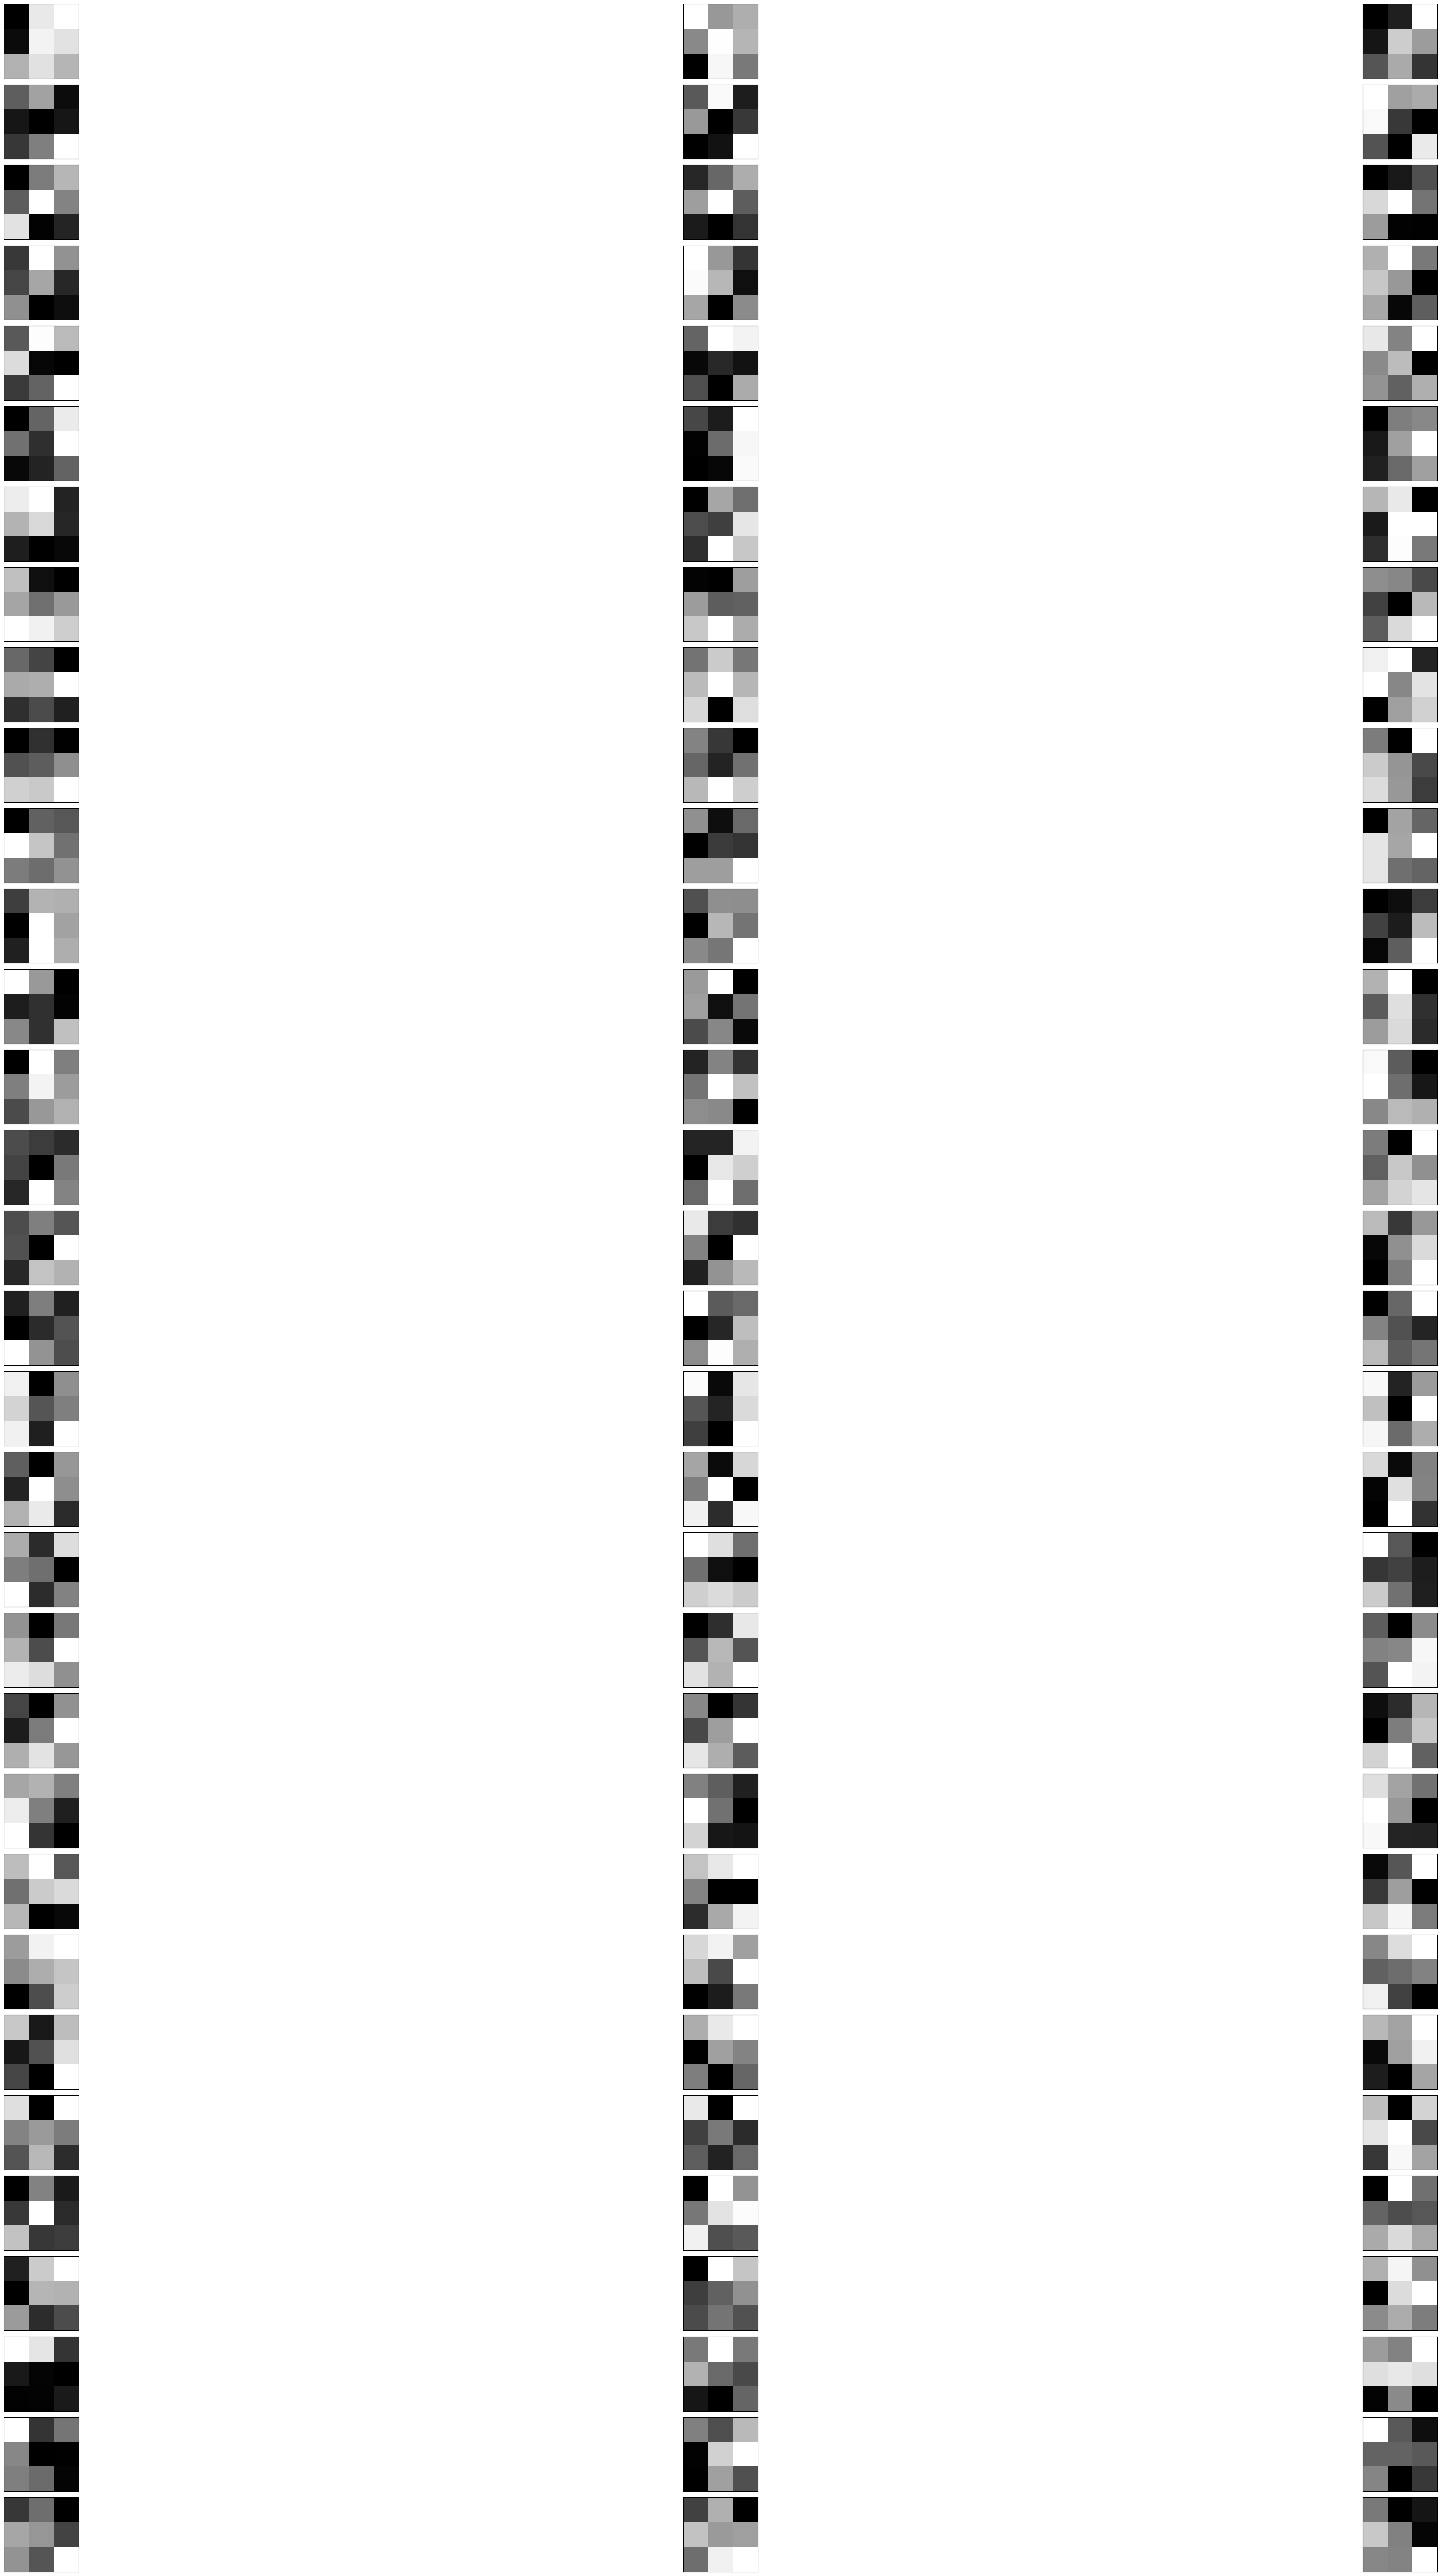

In [31]:
# plot first few filters
n_filters, ix = 32, 1
plt.figure(figsize=(IMG_SIZE, IMG_SIZE))
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(3):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix,)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.tight_layout()
plt.show()

In [32]:
# redefine model to output right after the first hidden layer
model = tf.keras.models.Model(inputs=cnn.inputs, outputs=cnn.layers[0].output)

1/1 [==============================] - 0s 24ms/step


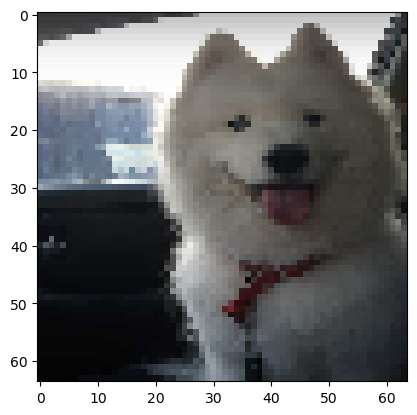

In [33]:
test_image = image.load_img('IMG_5707.PNG', target_size = (IMG_SIZE, IMG_SIZE))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)/255.0
test_image = np.expand_dims(test_image, axis = 0)
feature_map = model.predict(test_image)

In [34]:
feature_map

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.12311202e-03, 0.00000000e+00, 3.99401709e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.12311202e-03, 0.00000000e+00, 3.99401709e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          3.54655832e-03, 0.00000000e+00, 3.78727689e-02],
         ...,
         [0.00000000e+00, 0.00000000e+00, 1.11702560e-02, ...,
          1.26991466e-01, 0.00000000e+00, 7.59558305e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          2.41636127e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 4.91729528e-02, 0.00000000e+00, ...,
          2.23227769e-01, 2.49063782e-02, 0.00000000e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 5.03542423e-02],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 5.37789091e-02],
        

In [35]:
feature_map.shape

(1, 62, 62, 32)

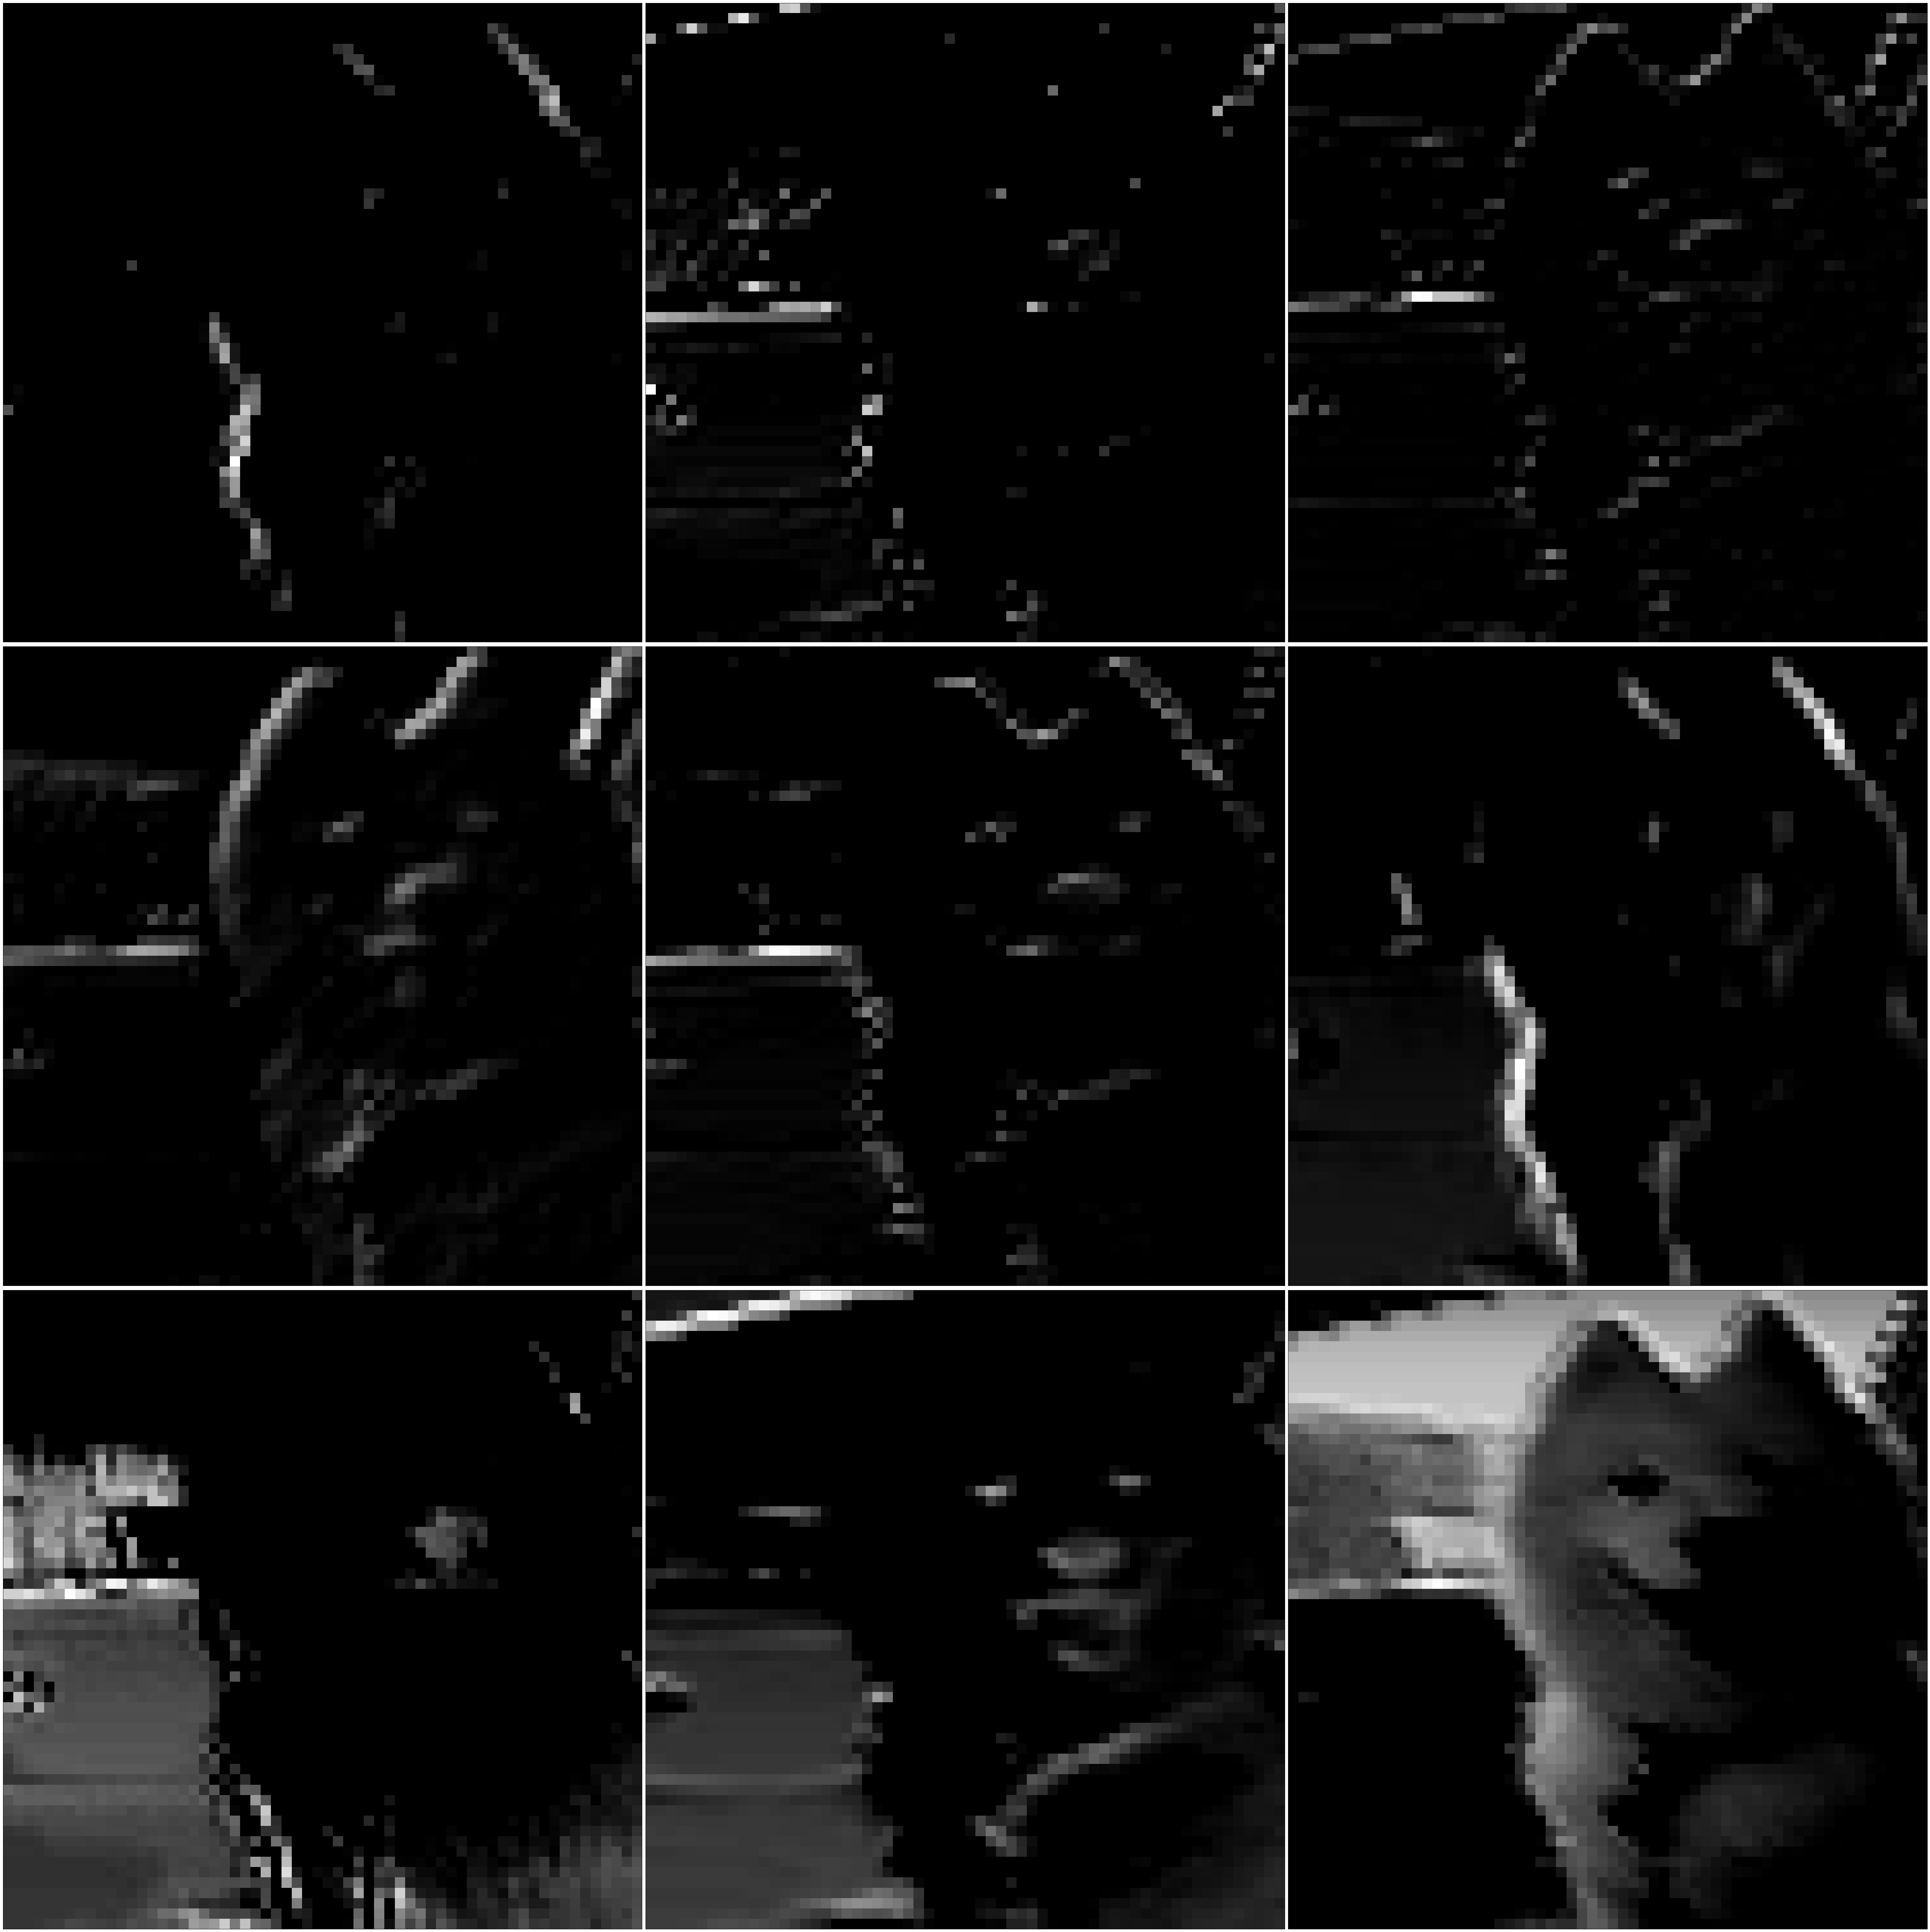

In [36]:
# plot all 64 maps in an 8x8 squares
square = 3
ix = 1
plt.figure(figsize=(IMG_SIZE, IMG_SIZE))
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = plt.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(feature_map[0, :, :, ix-1], cmap='gray')
		ix += 1
# show the figure
plt.tight_layout()
plt.show()

In [38]:
# EXPORTING THE KERAS MODEL
cnn.save('CATS_vs_DOGS_CNN.keras')